# Final Data Analysis 
### *Will Barlow*
#### **Research Question:** Which chords are considerably difficult to play and which ones are considerably complex? Are difficult chords necessarily complex and are complex chords necessarily difficult?

In [3]:
import pandas as pd
import numpy as np
import filetype 
import seaborn as sns
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt

def load_n_process(filepath):
    
    df1 = (
        #Load Data
        pd.read_csv(filepath,  delimiter = ';')
        
        #Clean Data
        #rename columns to shortened/abbreviated names
        .rename(columns={'CHORD_ROOT':'root','CHORD_TYPE':'type','CHORD_STRUCTURE':'struct','FINGER_POSITIONS':'f_pos','NOTE_NAMES':'notes'})
        
        #Process Data
        #create complexity and difficulty columns (to be modified later)
        .assign(difficulty=lambda x: x.f_pos)
        .assign(complexity=lambda x: x.struct)
        .assign(chord=lambda x: x.root + x.type)
        #display chord roots in alphabetical order
        .sort_values('root', ascending=True)
        #Data Wrangling unnecessary for this dataset
    )
    #modify complexity column to be a calculation of two other columns
    cmplxty_vals = calc_cmplx(df1.struct.array, df1.notes.array)
    for x,y in zip (df1.struct.array,cmplxty_vals):
        df1.complexity[df1.complexity==x] = y
    
    diff_vals = calc_diff(df1.difficulty.array)
    for a,b in zip (df1.difficulty.array,diff_vals):
        df1.difficulty[df1.difficulty==a] =b
        
    return df1

#Calculates complexity of a given chord by first adding the number of structure elements to the total number of notes in the chord then converting it to a percentage out of 100
def calc_cmplx(array1, array2):
    arg1 = []
    arg2 = []
    result = []
    for i in array1:
        arg1.append(len(i))
    for j in array2:
        arg2.append(len(j))
    k = 0
    for x,y in zip (arg1,arg2):
        result.append(4.41*((arg1[k]+arg2[k])-8))
        k+=1
    return result

#calculates difficulty as a dependent of how many fingers are used to make the chord 
def calc_diff(array):
    x_count = 0
    counts = []
    for i in array:
        x_count = 0
        for j in i:
            if j == 'x':
                x_count +=1
        counts.append((x_count-4)*-1)
    return counts

def descData(dataframe):
    return dataframe.describe().T

def getInfo(dataframe):
    return dataframe.info()
def x_y(df, x_axis, y_axis):
    sns.displot(df,x= df[x_axis],y=df[y_axis])
    


## **Exploratory EDA**
### **1. Data preview**

In [4]:
filepath='../../data/raw/chord-fingers.csv'
df = load_n_process(filepath)
df

,root,type,struct,f_pos,notes,difficulty,complexity,chord
1315,A,m,1;b3;5,"1,x,3,1,1,x","A,A,C,E",2,22.05,Am
1268,A,maj,1;3;5,"x,3,4,2,1,1","E,A,C#,E,A",3,30.87,Amaj
1267,A,maj,1;3;5,"x,x,3,1,2,x","C#,E,A",1,30.87,Amaj
1266,A,maj,1;3;5,"x,1,3,3,3,1","A,E,A,C#,E",3,30.87,Amaj
1265,A,maj,1;3;5,"2,1,x,x,x,x","A,C#",0,30.87,Amaj
...,...,...,...,...,...,...,...,...
1174,Gb,m9,1;b3;5;b7;9,"1,3,1,1,1,4","Gb,Db,Fb,Bbb,Db,Ab",4,61.74,Gbm9
1173,Gb,7(b9),1;3;5;b7;b9,"x,2,1,3,1,x","Gb,Bb,Fb,Abb",2,52.92,Gb7(b9)
1172,Gb,7(b9),1;3;5;b7;b9,"x,x,2,1,3,1","Gb,Bb,Fb,Abb",2,52.92,Gb7(b9)
1182,Gb,6/9,1;3;5;6;9,"x,2,1,1,3,4","Gb,Bb,Eb,Ab,Db",3,52.92,Gb6/9


### **2. Set categorical data & show data preview**

In [122]:
df['root'] = df['root'].astype('str')
df['chord'] = df['chord'].astype('str')
df['difficulty'] = df['difficulty'].astype('int64')
df['complexity'] = df['complexity'].astype('float64')
df['type'] = df['type'].astype('category')
df['struct'] = df['struct'].astype('category')
df['f_pos'] = df['f_pos'].astype('category')
df['notes'] =df['notes'].astype('category')


In [123]:
descData(df)

,count,mean,std,min,25%,50%,75%,max
difficulty,2632.0,2.299012,0.960979,0.0,2.00,2.0,3.00,4.00
complexity,2632.0,42.002234,17.536285,0.0,26.46,44.1,52.92,92.61


In [124]:
getInfo(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2632 entries, 1315 to 1147
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   root        2632 non-null   object  
 1   type        2632 non-null   category
 2   struct      2632 non-null   category
 3   f_pos       2632 non-null   category
 4   notes       2632 non-null   category
 5   difficulty  2632 non-null   int64   
 6   complexity  2632 non-null   float64 
 7   chord       2632 non-null   object  
dtypes: category(4), float64(1), int64(1), object(2)
memory usage: 224.5+ KB


In [125]:
df.max()

C:\Users\thewi\AppData\Local\Temp/ipykernel_7276/1151452817.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.max()


root             Gb
difficulty        4
complexity    92.61
chord         Gsus4
dtype: object

In [126]:
df.min()

C:\Users\thewi\AppData\Local\Temp/ipykernel_7276/3962516015.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.min()


root             A
difficulty       0
complexity     0.0
chord         A#11
dtype: object

### **3. Data vizualization with plot distributions**

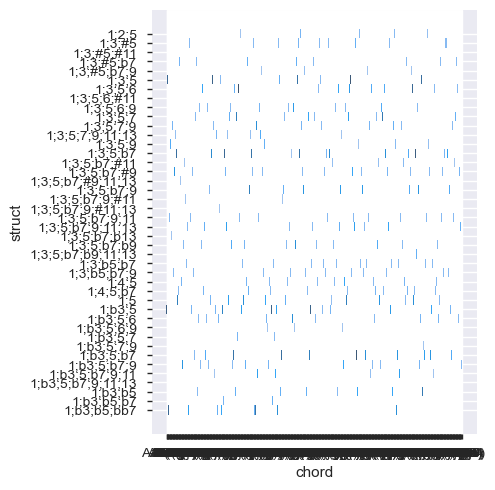

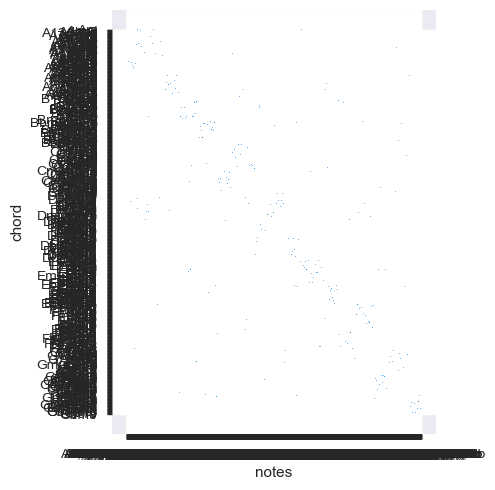

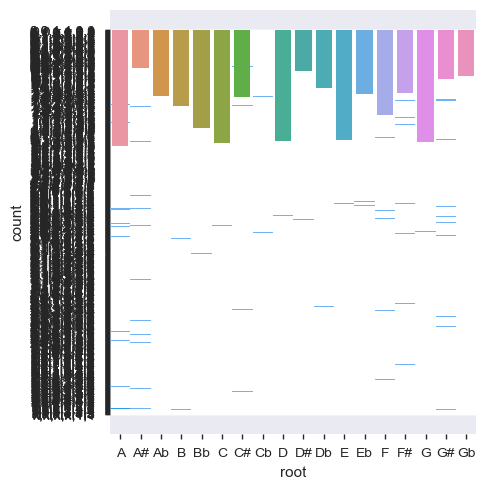

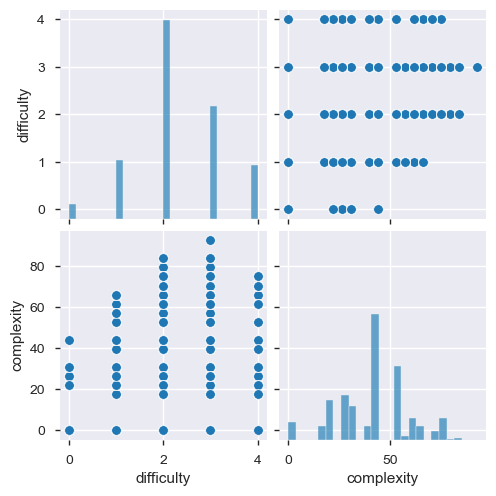

In [141]:

x_y(df,'chord','struct')
x_y(df, 'notes', 'chord')
x_y(df, 'chord','f_pos')
sns.countplot(x='root',data = df)
sns.pairplot(df)

## **Final Analysis**
##### **Warning large images (click to zoom)**

#### **Research Question:** Which chords are considerably difficult to play and which ones are considerably complex? Are difficult chords necessarily complex and are complex chords necessarily difficult?
#### I created two columns for my data to asses this question. The first being **"difficulty"** which is claculated as a dependent of how many fingers are used to make the chord. The difficulty of a given chord is rated on a scale from 0-4, with 0 being very easy to 4 being very hard. The second is **"complexity"** which is calculated by first adding the number of structure elements to the total number of notes in the chord then converting it to a percentage out of 100 with 100% being impossible (unrealistic). 
#### It is important to note that difficulty is a function of physical ability required to play (finger positions) and complexity is a function of a given chord's structure where the more elements in a chord's structure and the more notes it has make it more complex

### 1. Difficult Chords:
#### *a visualization of chord difficulty distribution by chord root*

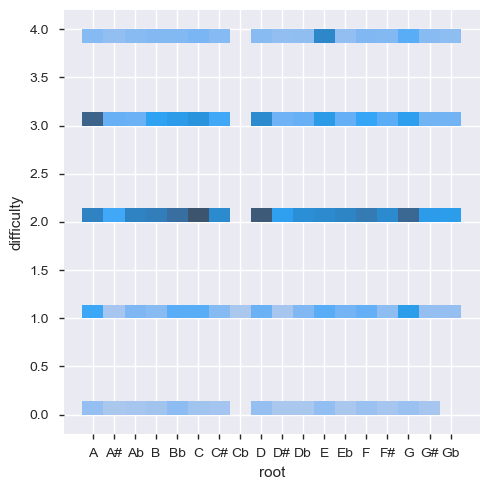

In [128]:
x_y(df,'root', 'difficulty')

#### *A magnificent display of every single playable guitar chord and its difficulty*


<AxesSubplot:xlabel='chord', ylabel='difficulty'>

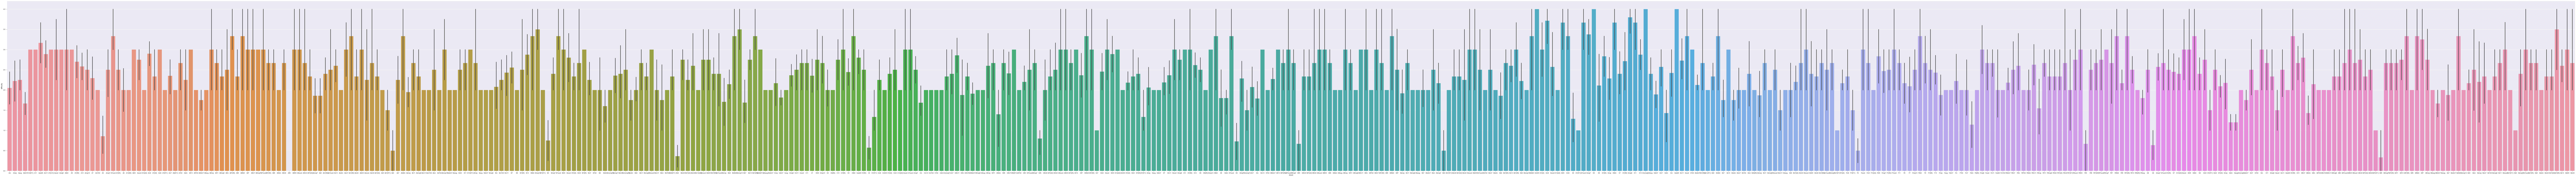

In [129]:
plt.figure(figsize=(300,20))
sns.barplot(x='chord', y= 'difficulty', data = df)

#### *Count of difficult chords*

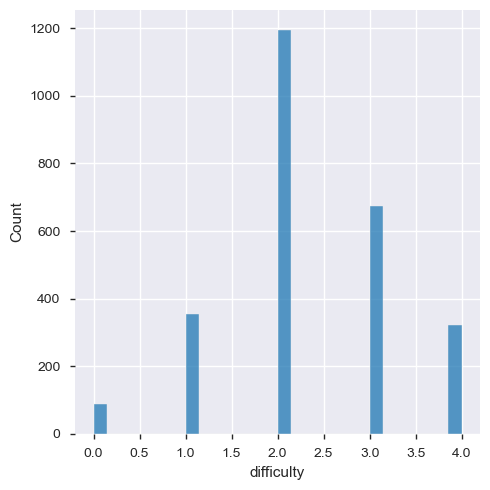

In [130]:
sns.displot(df['difficulty'])

### 2. Complex Chords
#### *A visualization of chord complexity by chord root*

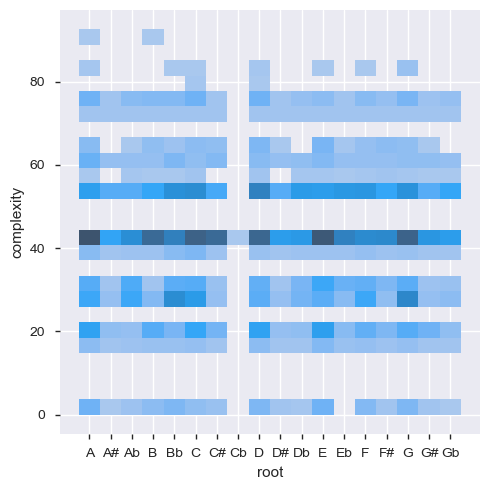

In [131]:
x_y(df,'root','complexity')

#### *Large display of every single playable chord and its complexity* 

<AxesSubplot:xlabel='chord', ylabel='complexity'>

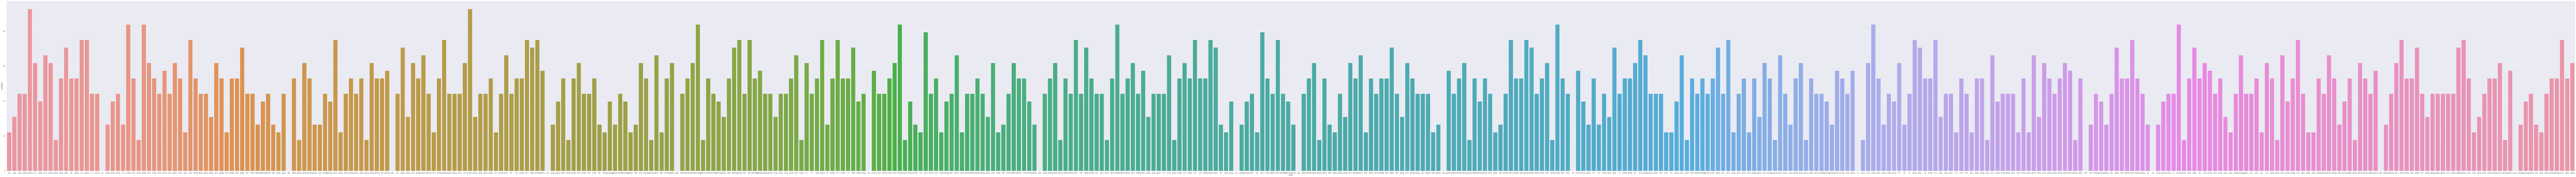

In [132]:
plt.figure(figsize=(300,20))
sns.barplot(x='chord',y='complexity',data=df)

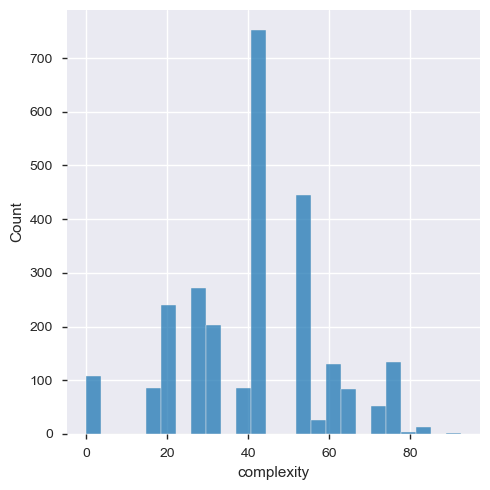

In [133]:
sns.displot(df['complexity'])

### 3. Analysis

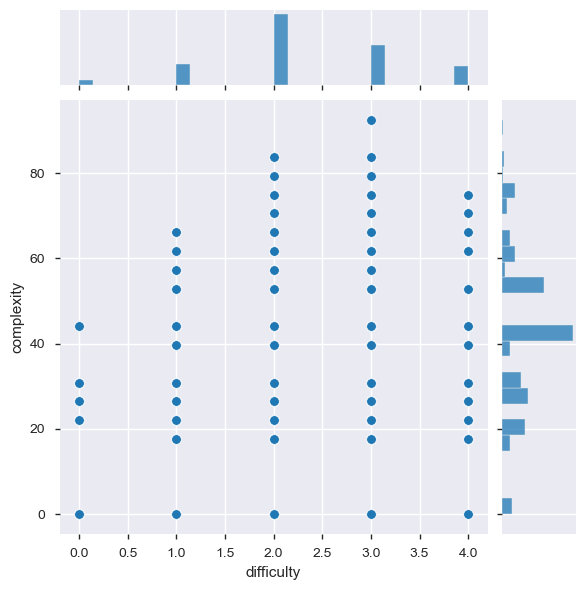

In [134]:
sns.jointplot(x='difficulty', y='complexity', data=df)

From the above joint plot, it is clear that there is some relationship between complex and difficult chords. 
It appears that where a chord is more complex, it is also more difficult. However, from the other charts, it is clear that this trend is not always true and there are some cases when a chord is not considerably difficult, but it is considerably complex and vice versa. 

In [135]:
df.max()

C:\Users\thewi\AppData\Local\Temp/ipykernel_7276/1151452817.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.max()


root             Gb
difficulty        4
complexity    92.61
chord         Gsus4
dtype: object

In [136]:
df.min()

C:\Users\thewi\AppData\Local\Temp/ipykernel_7276/3962516015.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.min()


root             A
difficulty       0
complexity     0.0
chord         A#11
dtype: object

Further, the most complex chord Gb sus4 (92% complex) is considered very hard with a rating of 4. The least complex chord A #11 is also considered very easy with a rating of 0. 


From the distribution of difficult to complex chords, it is also clear that most chords are moderately complex(40-60%) and moderately difficult (2-3).

### 4. Conclusion
#### As stated in my analysis, it appears that there is a trend of complex chords also being difficult to play. However, it is not true all of the time and there are outliers that are complex but not necessarily difficult and vice versa.
#### I will conclude by stating that in general, if a given chord is considerably complex, it will also be considerably difficult to play with some exceptions.

### 5. Data Export

In [6]:
df.to_csv('../../data/processed/processed.csv')